<a href="https://colab.research.google.com/github/HChandeepa/Reddit-posts-on-the-Israel-Palestine-War-War/blob/Master/Reddit_Israel_and__Gaza_war_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd  # Import the pandas library for data manipulation

# Load the dataset from a CSV file located in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/updated_dataset_with_index.csv')

In [ ]:
df.head()

,Index,Comments,Comment_Created_Date
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14


In [ ]:
df.iloc[89:96]

,Index,Comments,Comment_Created_Date
89,89,"Does any of the so called ""respectable"" news o...",10/18/2023 10:38
90,90,We can have 4k footage of some Jihadi Joe stra...,10/18/2023 9:12
91,91,The fact that they could come up with a casual...,10/18/2023 14:21
92,92,The news agencies that spread propaganda from ...,10/18/2023 15:51
93,93,[removed],10/18/2023 9:31
94,94,"Hold on, what about all those peaceful protest...",10/18/2023 9:13
95,95,Just going to leave this here for the inevitab...,10/18/2023 9:15


In [ ]:
df.shape

(15191, 3)

In [ ]:
# Check for missing values in the DataFrame
df.isna().sum().sum()


712

In [ ]:
# Drop all rows with missing values from the DataFrame
df = df.dropna()

In [ ]:
df.isna().sum().sum()

0

## Task 2: Text Preprocessing and Tokenization


In [ ]:
# Import the regular expressions library for pattern matching
import re
 # function to clean text
def remove_special_characters(text):
    if isinstance(text, str):
        # Remove special characters and punctuation using regex
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
        return cleaned_text.strip()
    return ""

In [ ]:
df['Cleaned_Text'] = df['Comments'].apply(remove_special_characters)

In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...


In [ ]:
df.iloc[73:77]

,Index,Comments,Comment_Created_Date,Cleaned_Text
74,74,Israel provides Gaza with electricity despite ...,10/7/2023 18:47,Israel provides Gaza with electricity despite ...
75,75,People keep saying the cycle of violence conti...,10/7/2023 17:11,People keep saying the cycle of violence conti...
77,77,I am trying to follow the news of this war but...,10/18/2023 15:40,I am trying to follow the news of this war but...
78,78,Not even the hospital was bombed. Any formal a...,10/18/2023 9:11,Not even the hospital was bombed Any formal ap...


In [ ]:
# function to tokenize input text
def tokenize_text(text):
    if isinstance(text, str):  # Check the input is of type string
        # Tokenize the text into words
        # The split() method divides the string into a list of words based on spaces
        tokens = text.split()
        return tokens  # Return the list of tokens
    return []  # Return an empty list if the input is not a string


In [ ]:
# Apply tokenization to cleaned text
df['Tokenized_Text'] = df['Cleaned_Text'].apply(tokenize_text)

In [ ]:
df.iloc[73:77]

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text
74,74,Israel provides Gaza with electricity despite ...,10/7/2023 18:47,Israel provides Gaza with electricity despite ...,"[Israel, provides, Gaza, with, electricity, de..."
75,75,People keep saying the cycle of violence conti...,10/7/2023 17:11,People keep saying the cycle of violence conti...,"[People, keep, saying, the, cycle, of, violenc..."
77,77,I am trying to follow the news of this war but...,10/18/2023 15:40,I am trying to follow the news of this war but...,"[I, am, trying, to, follow, the, news, of, thi..."
78,78,Not even the hospital was bombed. Any formal a...,10/18/2023 9:11,Not even the hospital was bombed Any formal ap...,"[Not, even, the, hospital, was, bombed, Any, f..."


In [ ]:
print("Missing values in Preprocessed_Comment_Text:", df['Tokenized_Text'].isnull().sum())

Missing values in Preprocessed_Comment_Text: 0


In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja..."
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,..."
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ..."
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad..."
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,..."


In [ ]:
# Import the stopwords from the nltk library
from nltk.corpus import stopwords

# Ensure the stopwords corpus is downloaded before using it
import nltk
nltk.download('stopwords')

# Load the set of English stop words from the nltk library
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    # Use list comprehension to filter out tokens that are in the stop_words set
    # Convert each token to lowercase for case insensitive comparison
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Return the filtered list of tokens
    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply stopword removal
df['Filtered_Tokens'] = df['Tokenized_Text'].apply(remove_stopwords)

In [ ]:
print(df[['Comments', 'Tokenized_Text']].head())

                                            Comments  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  
0  [As, per, CNN, Israeli, Prime, Minister, Benja...  
1  [Whats, the, long, game, hereish, weeks, does,...  
2  [Good, job, to, US, diplomats, for, changing, ...  
3  [The, US, is, in, a, crucial, position, to, ad...  
4  [Everybody, hates, the, United, States, until,...  


In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text,Filtered_Tokens
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja...","[per, CNN, Israeli, Prime, Minister, Benjamin,..."
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,...","[Whats, long, game, hereish, weeks, Israel, ob..."
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ...","[Good, job, US, diplomats, changing, Isreals, ..."
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad...","[US, crucial, position, advance, humanitarian,..."
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,...","[Everybody, hates, United, States, time, Unite..."


In [ ]:
# Import WordNetLemmatizer for word lemmatization
from nltk.stem import WordNetLemmatizer

# Ensure WordNet is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Apply lemmatization
df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

In [ ]:
df[['Comments','Lemmatized_Tokens']].head()

,Comments,Lemmatized_Tokens
0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[per, CNN, Israeli, Prime, Minister, Benjamin,..."
1,What’s the long game here?(3ish weeks) does Is...,"[Whats, long, game, hereish, week, Israel, obl..."
2,Good job to U.S. diplomats for changing Isreal...,"[Good, job, US, diplomat, changing, Isreals, m..."
3,The US is in a crucial position to advance the...,"[US, crucial, position, advance, humanitarian,..."
4,Everybody hates the United States until it’s t...,"[Everybody, hate, United, States, time, United..."


In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text,Filtered_Tokens,Lemmatized_Tokens
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[per, CNN, Israeli, Prime, Minister, Benjamin,..."
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,...","[Whats, long, game, hereish, weeks, Israel, ob...","[Whats, long, game, hereish, week, Israel, obl..."
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ...","[Good, job, US, diplomats, changing, Isreals, ...","[Good, job, US, diplomat, changing, Isreals, m..."
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad...","[US, crucial, position, advance, humanitarian,...","[US, crucial, position, advance, humanitarian,..."
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,...","[Everybody, hates, United, States, time, Unite...","[Everybody, hate, United, States, time, United..."


In [ ]:
# Import the ngrams function from nltk.util to generate n-grams
from nltk.util import ngrams
# function to create n grams from a list of tokens
def create_ngrams(tokens, n=2):
    if tokens:
        ngrams_list = list(ngrams(tokens, n))
        return ngrams_list
    return []

In [ ]:
# Apply n-gram generation
df['Bigrams'] = df['Lemmatized_Tokens'].apply(lambda x: create_ngrams(x, n=2))

# Apply n-gram generation
df['Trigrams'] = df['Lemmatized_Tokens'].apply(lambda x: create_ngrams(x, n=3))

In [ ]:
# Display the original tokens and n-grams for verification
for i in range(5):
    print(f"Row {i + 1}:")
    print(f"Original Tokens: {df['Tokenized_Text'].iloc[i]}")
    print(f"Bigrams: {df['Bigrams'].iloc[i]}")
    print(f"Trigrams: {df['Trigrams'].iloc[i]}")
    print("-" * 50)


Row 1:
Original Tokens: ['As', 'per', 'CNN', 'Israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahus', 'office', 'told', 'CNN', 'Sunday', 'Israel', 'has', 'restored', 'water', 'to', 'southern', 'Gaza', 'but', 'the', 'director', 'of', 'the', 'Palestinian', 'Water', 'Authority', 'said', 'he', 'could', 'not', 'be', 'sure', 'it', 'was', 'true', 'because', 'electricity', 'has', 'not', 'been', 'restored', 'I', 'cannot', 'confirm', 'this', 'at', 'the', 'moment', 'because', 'our', 'water', 'stations', 'in', 'Khan', 'Younis', 'Gaza', 'City', 'and', 'central', 'Gaza', 'are', 'not', 'in', 'a', 'condition', 'to', 'receive', 'and', 'distribute', 'water', 'to', 'the', 'people', 'Munther', 'Shublaq', 'the', 'director', 'of', 'the', 'Water', 'Authority', 'in', 'Gaza', 'told', 'CNN', 'To', 'enable', 'the', 'stations', 'to', 'receive', 'and', 'distribute', 'water', 'we', 'need', 'electricity', 'which', 'is', 'currently', 'cut', 'off', 'The', 'alternative', 'is', 'fuel', 'to', 'power', 'the', 'generator'

In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text,Filtered_Tokens,Lemmatized_Tokens,Bigrams,Trigrams
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[(per, CNN), (CNN, Israeli), (Israeli, Prime),...","[(per, CNN, Israeli), (CNN, Israeli, Prime), (..."
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,...","[Whats, long, game, hereish, weeks, Israel, ob...","[Whats, long, game, hereish, week, Israel, obl...","[(Whats, long), (long, game), (game, hereish),...","[(Whats, long, game), (long, game, hereish), (..."
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ...","[Good, job, US, diplomats, changing, Isreals, ...","[Good, job, US, diplomat, changing, Isreals, m...","[(Good, job), (job, US), (US, diplomat), (dipl...","[(Good, job, US), (job, US, diplomat), (US, di..."
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad...","[US, crucial, position, advance, humanitarian,...","[US, crucial, position, advance, humanitarian,...","[(US, crucial), (crucial, position), (position...","[(US, crucial, position), (crucial, position, ..."
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,...","[Everybody, hates, United, States, time, Unite...","[Everybody, hate, United, States, time, United...","[(Everybody, hate), (hate, United), (United, S...","[(Everybody, hate, United), (hate, United, Sta..."


## Task 3: POS Tagging and Named Entity Recognition (NER)

Part-of-Speech (POS) Tagging
Objective:
Identify the part of speech (e.g., noun, verb, adjective) for each word in the preprocessed text and determine the most common POS tags.

In [ ]:
import spacy

# Load SpaCy's English language model
nlp = spacy.load("en_core_web_sm")  # Make sure the model is installed

In [ ]:
def pos_tagging(text):
  doc = nlp(" ".join(text)) # Convert list of strings into single string
  return [(token.text, token.pos_) for token in doc] # Return tokens and their POS Tags


In [ ]:
# Apply POS tagging to the tokenized text
df['POS_Tags'] = df['Lemmatized_Tokens'].apply(pos_tagging)

In [ ]:
print(df[['Lemmatized_Tokens', 'POS_Tags']].head())

                                   Lemmatized_Tokens  \
0  [per, CNN, Israeli, Prime, Minister, Benjamin,...   
1  [Whats, long, game, hereish, week, Israel, obl...   
2  [Good, job, US, diplomat, changing, Isreals, m...   
3  [US, crucial, position, advance, humanitarian,...   
4  [Everybody, hate, United, States, time, United...   

                                            POS_Tags  
0  [(per, ADP), (CNN, PROPN), (Israeli, ADJ), (Pr...  
1  [(What, PRON), (s, VERB), (long, ADJ), (game, ...  
2  [(Good, ADJ), (job, NOUN), (US, PROPN), (diplo...  
3  [(US, PROPN), (crucial, ADJ), (position, NOUN)...  
4  [(Everybody, PRON), (hate, VERB), (United, PRO...  


In [ ]:
# count of POS Frequencies
from collections import Counter
# Flatten list of POS tags
all_pos_tags = [pos for tags in df['POS_Tags'] for _, pos in tags]
pos_counts = Counter(all_pos_tags)

# Display the most common POS tags
print("Most common POS tags:")
for tag, count in pos_counts.most_common():
    print(f"{tag}: {count}")

Most common POS tags:
NOUN: 136482
VERB: 94683
PROPN: 61889
ADJ: 58632
ADV: 28151
AUX: 15861
PRON: 9807
PART: 7729
ADP: 5228
NUM: 3718
INTJ: 2373
SCONJ: 2151
DET: 1509
X: 675
CCONJ: 552
PUNCT: 94
SYM: 34


Named Entity Recognition (NER)
Objective:
Identify named entities (e.g., people, organizations, locations, dates) in the comments.

In [ ]:
def ner_extraction(text):
  doc = nlp(" ".join(text)) # Convert list of tokens into a single string
  return [(ent.text, ent.label_) for ent in doc.ents] # Extract entity texct and label


In [ ]:
df['Entities'] = df['Lemmatized_Tokens'].apply(ner_extraction)

In [ ]:
df[['Lemmatized_Tokens', 'Entities']].head()

,Lemmatized_Tokens,Entities
0,"[per, CNN, Israeli, Prime, Minister, Benjamin,...","[(CNN, ORG), (Israeli, NORP), (Benjamin Netany..."
1,"[Whats, long, game, hereish, week, Israel, obl...","[(Israel, GPE), (GazaHamas, ORG), (Palestinian..."
2,"[Good, job, US, diplomat, changing, Isreals, m...","[(US, GPE)]"
3,"[US, crucial, position, advance, humanitarian,...","[(US, GPE), (Palestinians, NORP)]"
4,"[Everybody, hate, United, States, time, United...","[(United States, GPE), (United States, GPE)]"


In [ ]:
# Flatten the list of entities
all_entities = [entity for entities in df['Entities'] for entity in entities]
entity_counts = Counter([ent[1] for ent in all_entities])  # Count by entity type

# Display the most common entity types
print("Most Common Entity Types:")
for entity_type, count in entity_counts.most_common():
    print(f"{entity_type}: {count}")


Most Common Entity Types:
GPE: 15696
NORP: 15221
ORG: 11752
PERSON: 4137
CARDINAL: 2550
DATE: 2400
LOC: 888
ORDINAL: 591
PRODUCT: 231
EVENT: 165
TIME: 152
FAC: 102
WORK_OF_ART: 100
LANGUAGE: 58
MONEY: 46
LAW: 20
QUANTITY: 19
PERCENT: 4


In [ ]:
person_entities = [ent[0] for ent in all_entities if ent[1] == "PERSON"]
print("Most Common PERSON Entities:", Counter(person_entities).most_common(10))

Most Common PERSON Entities: [('Netanyahu', 297), ('Biden', 114), ('Bibi', 87), ('Oct', 68), ('Gazas', 57), ('Gazan', 47), ('Jordan', 44), ('Jew', 32), ('Nakba', 30), ('Hamass', 27)]


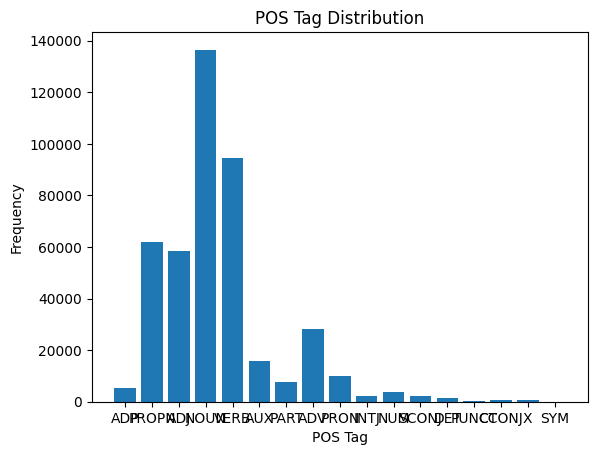

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

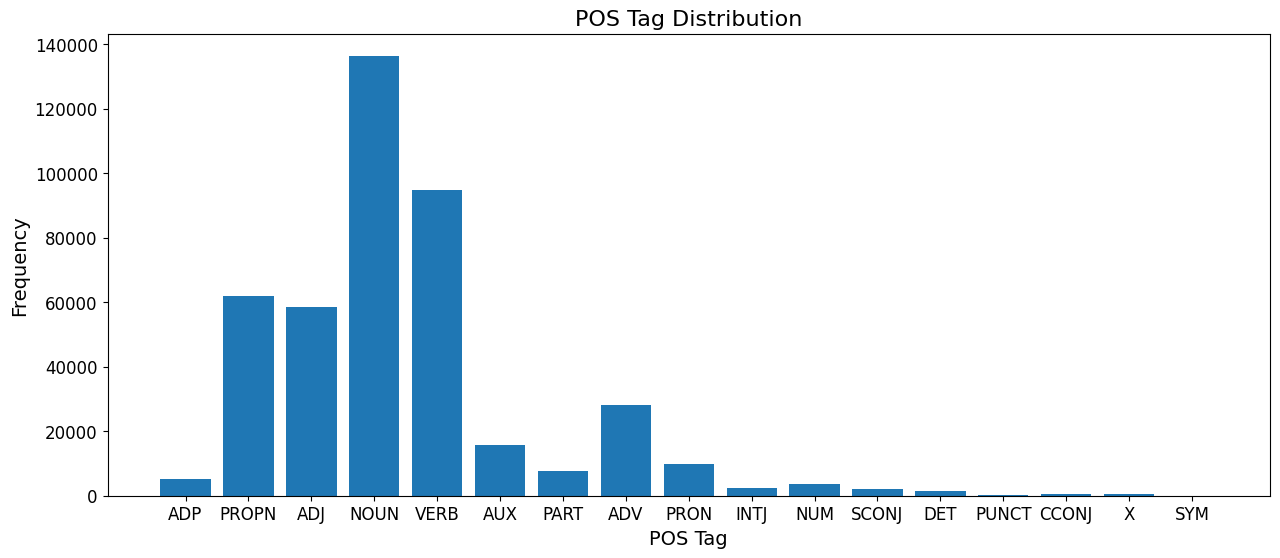

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution", fontsize=16)
plt.xlabel("POS Tag", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


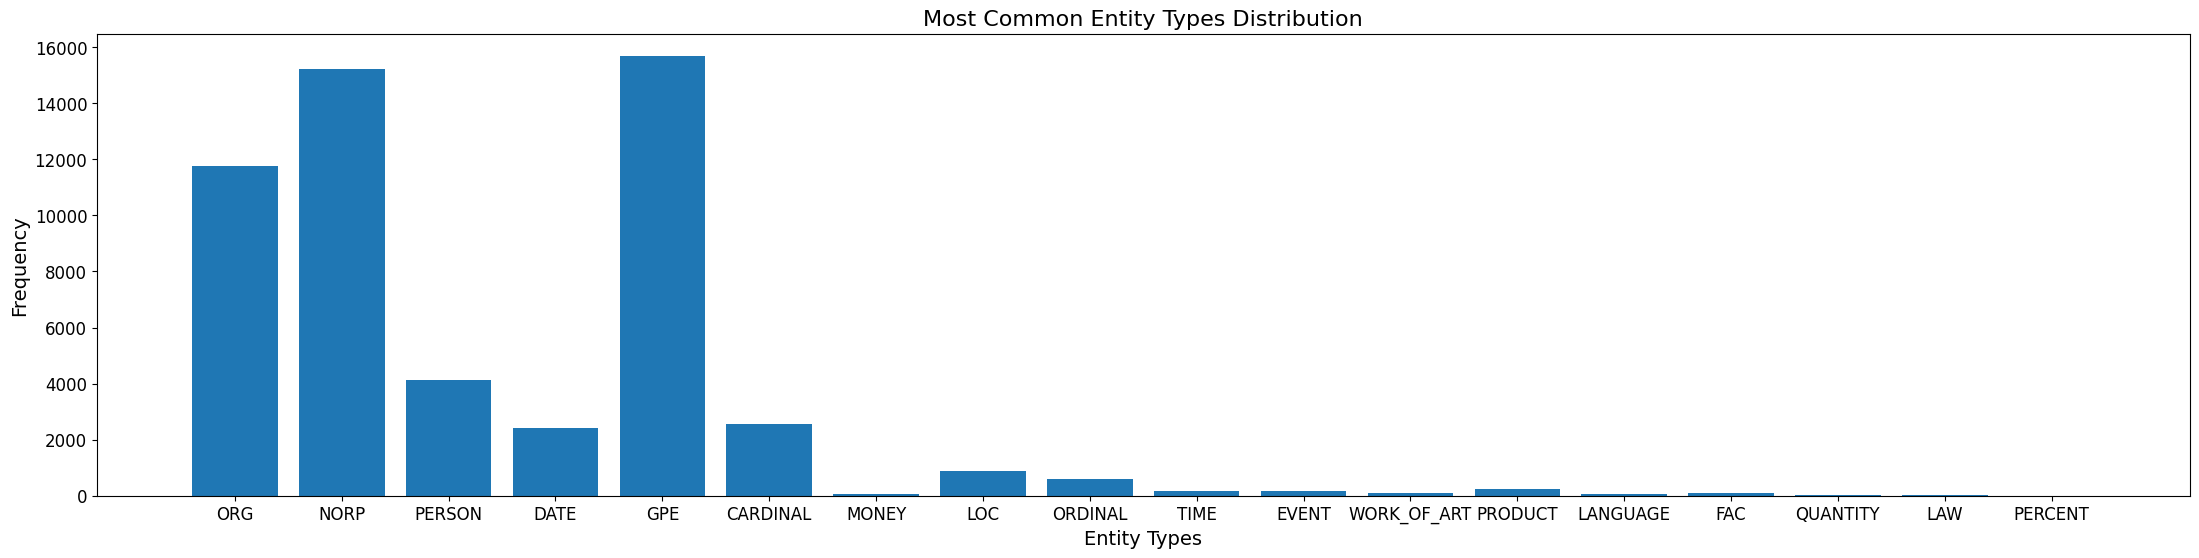

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(27, 6))

# Bar plot of most common entity types
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title("Most Common Entity Types Distribution", fontsize=16)
plt.xlabel("Entity Types", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Task 4: Sentiment Analysis


In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Sentiment Analysis using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Intialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to classify sentiment based on compound score
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Vader_Sentiment'] = df['Comments'].apply(vader_sentiment)

In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text,Filtered_Tokens,Lemmatized_Tokens,Bigrams,Trigrams,POS_Tags,Entities,Vader_Sentiment
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[(per, CNN), (CNN, Israeli), (Israeli, Prime),...","[(per, CNN, Israeli), (CNN, Israeli, Prime), (...","[(per, ADP), (CNN, PROPN), (Israeli, ADJ), (Pr...","[(CNN, ORG), (Israeli, NORP), (Benjamin Netany...",Positive
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,...","[Whats, long, game, hereish, weeks, Israel, ob...","[Whats, long, game, hereish, week, Israel, obl...","[(Whats, long), (long, game), (game, hereish),...","[(Whats, long, game), (long, game, hereish), (...","[(What, PRON), (s, VERB), (long, ADJ), (game, ...","[(Israel, GPE), (GazaHamas, ORG), (Palestinian...",Negative
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ...","[Good, job, US, diplomats, changing, Isreals, ...","[Good, job, US, diplomat, changing, Isreals, m...","[(Good, job), (job, US), (US, diplomat), (dipl...","[(Good, job, US), (job, US, diplomat), (US, di...","[(Good, ADJ), (job, NOUN), (US, PROPN), (diplo...","[(US, GPE)]",Positive
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad...","[US, crucial, position, advance, humanitarian,...","[US, crucial, position, advance, humanitarian,...","[(US, crucial), (crucial, position), (position...","[(US, crucial, position), (crucial, position, ...","[(US, PROPN), (crucial, ADJ), (position, NOUN)...","[(US, GPE), (Palestinians, NORP)]",Positive
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,...","[Everybody, hates, United, States, time, Unite...","[Everybody, hate, United, States, time, United...","[(Everybody, hate), (hate, United), (United, S...","[(Everybody, hate, United), (hate, United, Sta...","[(Everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive


In [ ]:
df2 = df[['Comments','Vader_Sentiment']]
df2.iloc[73:80]

,Comments,Vader_Sentiment
74,Israel provides Gaza with electricity despite ...,Negative
75,People keep saying the cycle of violence conti...,Negative
77,I am trying to follow the news of this war but...,Negative
78,Not even the hospital was bombed. Any formal a...,Positive
79,Theres a lot of people out there who should ha...,Positive
80,The damage was already done. Muslims all over ...,Negative
81,So Hamas manufactured a crisis that resulted i...,Positive


In [ ]:
from textblob import TextBlob

# Function to classify sentiment based on polarity
def textblob_sentiment(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
df['TextBlob_sentiment'] = df['Comments'].apply(textblob_sentiment)

In [ ]:
df.head()

,Index,Comments,Comment_Created_Date,Cleaned_Text,Tokenized_Text,Filtered_Tokens,Lemmatized_Tokens,Bigrams,Trigrams,POS_Tags,Entities,Vader_Sentiment,TextBlob_sentiment
0,0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,10/15/2023 17:52,As per CNN\n\nIsraeli Prime Minister Benjamin ...,"[As, per, CNN, Israeli, Prime, Minister, Benja...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[per, CNN, Israeli, Prime, Minister, Benjamin,...","[(per, CNN), (CNN, Israeli), (Israeli, Prime),...","[(per, CNN, Israeli), (CNN, Israeli, Prime), (...","[(per, ADP), (CNN, PROPN), (Israeli, ADJ), (Pr...","[(CNN, ORG), (Israeli, NORP), (Benjamin Netany...",Positive,Positive
1,1,What’s the long game here?(3ish weeks) does Is...,10/15/2023 16:54,Whats the long game hereish weeks does Israel ...,"[Whats, the, long, game, hereish, weeks, does,...","[Whats, long, game, hereish, weeks, Israel, ob...","[Whats, long, game, hereish, week, Israel, obl...","[(Whats, long), (long, game), (game, hereish),...","[(Whats, long, game), (long, game, hereish), (...","[(What, PRON), (s, VERB), (long, ADJ), (game, ...","[(Israel, GPE), (GazaHamas, ORG), (Palestinian...",Negative,Negative
2,2,Good job to U.S. diplomats for changing Isreal...,10/15/2023 16:24,Good job to US diplomats for changing Isreals ...,"[Good, job, to, US, diplomats, for, changing, ...","[Good, job, US, diplomats, changing, Isreals, ...","[Good, job, US, diplomat, changing, Isreals, m...","[(Good, job), (job, US), (US, diplomat), (dipl...","[(Good, job, US), (job, US, diplomat), (US, di...","[(Good, ADJ), (job, NOUN), (US, PROPN), (diplo...","[(US, GPE)]",Positive,Positive
3,3,The US is in a crucial position to advance the...,10/15/2023 16:44,The US is in a crucial position to advance the...,"[The, US, is, in, a, crucial, position, to, ad...","[US, crucial, position, advance, humanitarian,...","[US, crucial, position, advance, humanitarian,...","[(US, crucial), (crucial, position), (position...","[(US, crucial, position), (crucial, position, ...","[(US, PROPN), (crucial, ADJ), (position, NOUN)...","[(US, GPE), (Palestinians, NORP)]",Positive,Positive
4,4,Everybody hates the United States until it’s t...,10/15/2023 20:14,Everybody hates the United States until its ti...,"[Everybody, hates, the, United, States, until,...","[Everybody, hates, United, States, time, Unite...","[Everybody, hate, United, States, time, United...","[(Everybody, hate), (hate, United), (United, S...","[(Everybody, hate, United), (hate, United, Sta...","[(Everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive,Neutral


In [ ]:
df3 = df[['Comments','TextBlob_sentiment']]
df3.iloc[73:80]

,Comments,TextBlob_sentiment
74,Israel provides Gaza with electricity despite ...,Negative
75,People keep saying the cycle of violence conti...,Positive
77,I am trying to follow the news of this war but...,Negative
78,Not even the hospital was bombed. Any formal a...,Neutral
79,Theres a lot of people out there who should ha...,Positive
80,The damage was already done. Muslims all over ...,Neutral
81,So Hamas manufactured a crisis that resulted i...,Positive


In [ ]:
from transformers import pipeline

bert_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


# initialize a sentiment analysis piepline use Pre-Trained BERT model

# Function to extract sentiment using BERT
def bert_sentiment(text):
    result = bert_analyzer(text[:512])[0]  # Truncate text to max 512 tokens
    return result['label']

Device set to use cpu


In [ ]:
df['BERT_Sentiments'] = df['Comments'].apply(bert_sentiment)

In [ ]:
df3 = df[['Comments','BERT_Sentiments']]
df3.iloc[73:80]

,Comments,BERT_Sentiments
74,Israel provides Gaza with electricity despite ...,NEGATIVE
75,People keep saying the cycle of violence conti...,POSITIVE
77,I am trying to follow the news of this war but...,NEGATIVE
78,Not even the hospital was bombed. Any formal a...,NEGATIVE
79,Theres a lot of people out there who should ha...,POSITIVE
80,The damage was already done. Muslims all over ...,NEGATIVE
81,So Hamas manufactured a crisis that resulted i...,NEGATIVE


In [ ]:
df[['Comments','Vader_Sentiment','TextBlob_sentiment','BERT_Sentiments']].head()

,Comments,Vader_Sentiment,TextBlob_sentiment,BERT_Sentiments
0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,Positive,Positive,NEGATIVE
1,What’s the long game here?(3ish weeks) does Is...,Negative,Negative,NEGATIVE
2,Good job to U.S. diplomats for changing Isreal...,Positive,Positive,POSITIVE
3,The US is in a crucial position to advance the...,Positive,Positive,POSITIVE
4,Everybody hates the United States until it’s t...,Positive,Neutral,NEGATIVE


<ipython-input-162-25d63cefc7ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


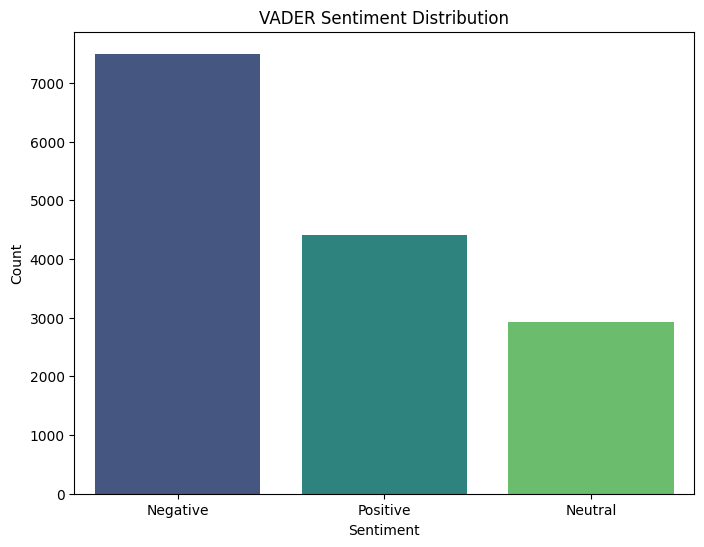

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['Vader_Sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-163-8ba262e916e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Text_Blob_counts.index, y=Text_Blob_counts.values, palette="viridis")


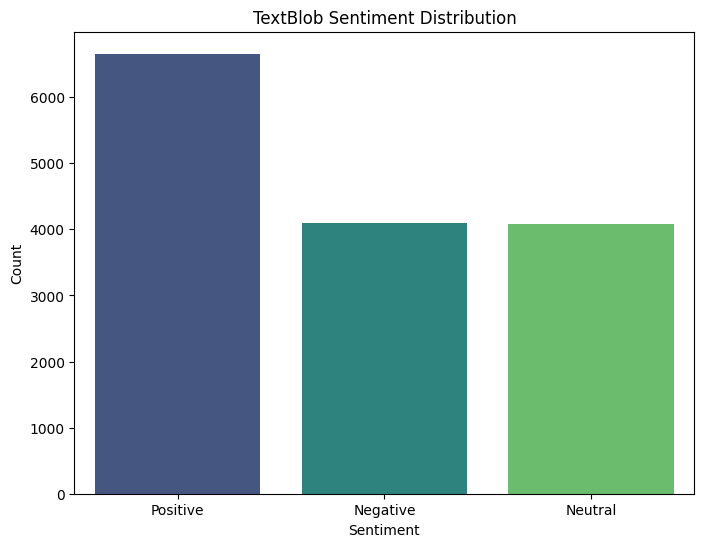

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for Text Blob
Text_Blob_counts = df['TextBlob_sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=Text_Blob_counts.index, y=Text_Blob_counts.values, palette="viridis")
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-164-a80f5581080f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=BERT_counts.index, y=BERT_counts.values, palette="viridis")


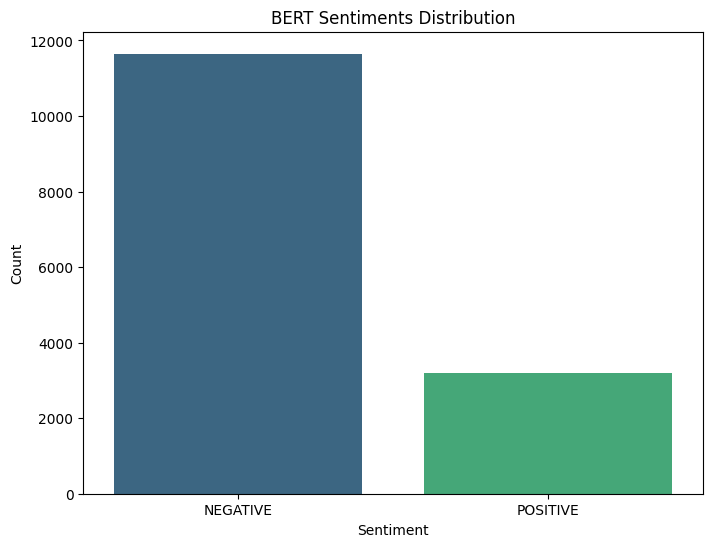

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
BERT_counts = df['BERT_Sentiments'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=BERT_counts.index, y=BERT_counts.values, palette="viridis")
plt.title("BERT Sentiments Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Comment_Created_Date'] = pd.to_datetime(df['Comment_Created_Date'])

In [ ]:
# Group by date and calculate sentiment counts
sentiment_trends = df.groupby([df['Comment_Created_Date'].dt.date, 'Vader_Sentiment']).size().unstack(fill_value=0)
# Calculate propotion6 for each sen6timent
sentiment_trends = sentiment_trends.div(sentiment_trends.sum(axis=1), axis=0)

# Reset index for visualization
sentiment_trends.reset_index(inplace=True)

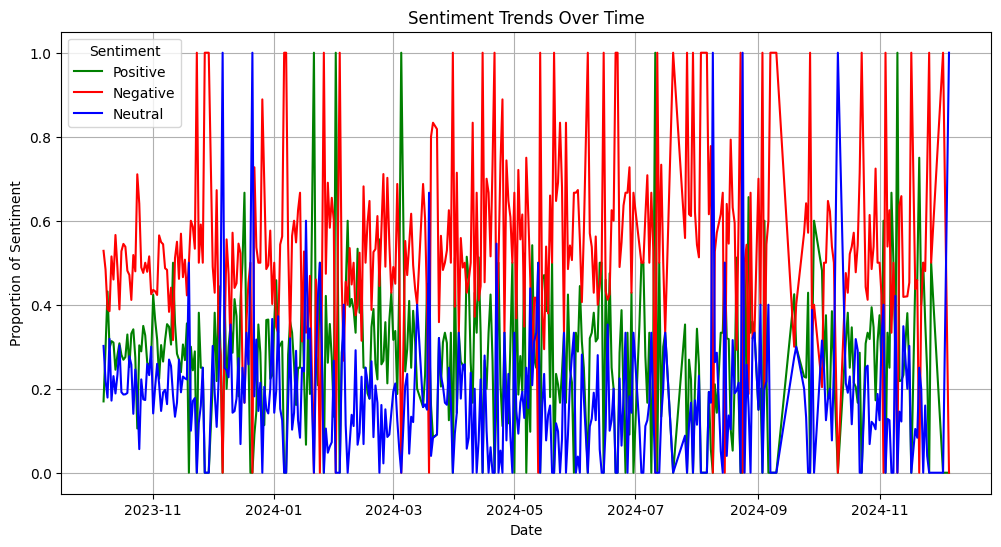

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

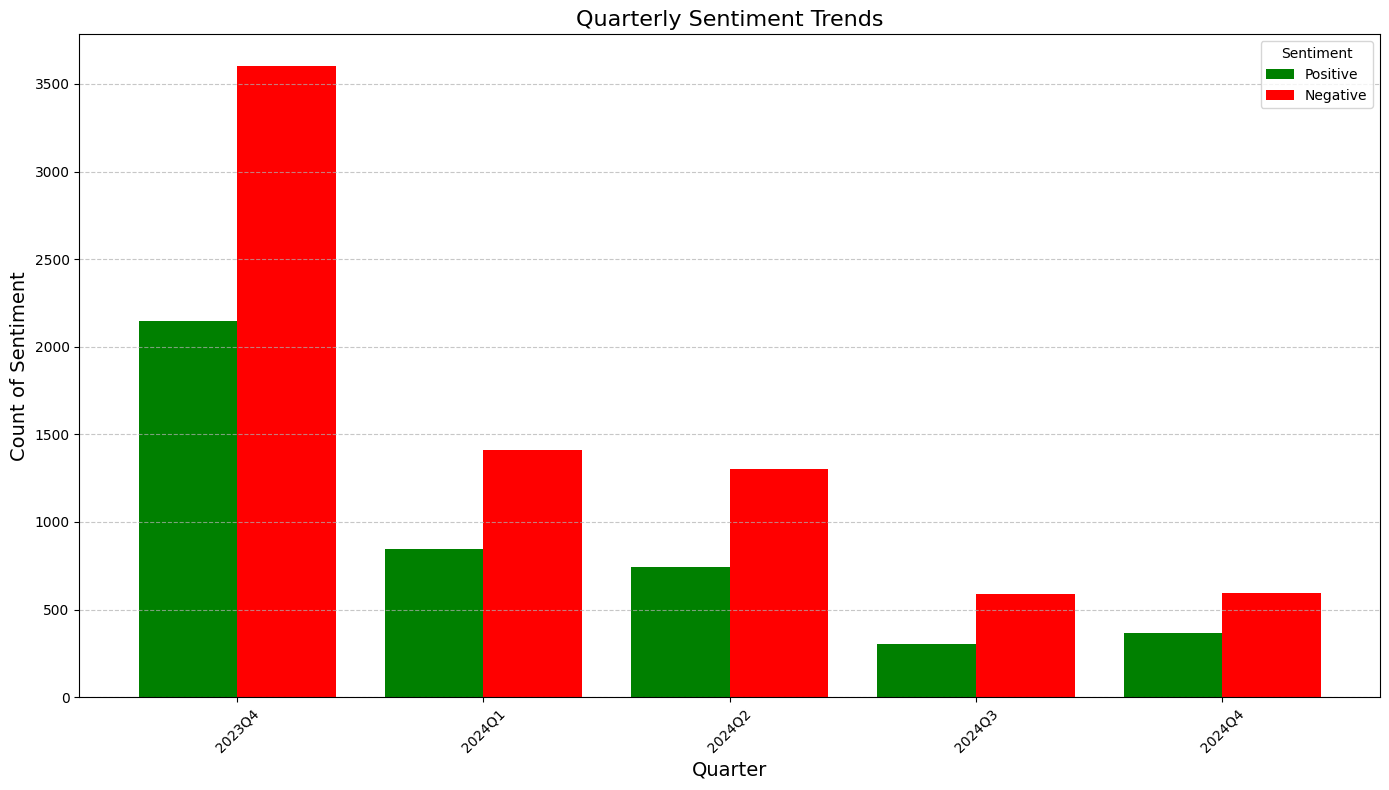

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Comment_Created_Date' column to datetime
df['Comment_Created_Date'] = pd.to_datetime(df['Comment_Created_Date'])

# Extract quarterly periods for grouping (3 months each)
df['Quarter'] = df['Comment_Created_Date'].dt.to_period('Q')

# Group by quarter and sentiment, then calculate counts
quarterly_sentiment = df.groupby(['Quarter', 'Vader_Sentiment']).size().unstack(fill_value=0)

# Exclude 'Neutral' sentiment
quarterly_sentiment = quarterly_sentiment[['Positive', 'Negative']]

# Reset index for plotting
quarterly_sentiment.reset_index(inplace=True)

# Plot sentiment trends as grouped bar chart
plt.figure(figsize=(14, 8))

# Set positions for bars
quarters = quarterly_sentiment['Quarter'].astype(str)
x = range(len(quarters))  # Numerical positions for bars
bar_width = 0.4

# Plot Positive and Negative bars
plt.bar(
    [pos - bar_width / 2 for pos in x],
    quarterly_sentiment['Positive'],
    label='Positive',
    color='green',
    width=bar_width
)
plt.bar(
    [pos + bar_width / 2 for pos in x],
    quarterly_sentiment['Negative'],
    label='Negative',
    color='red',
    width=bar_width
)

# Add titles and labels
plt.title("Quarterly Sentiment Trends", fontsize=16)
plt.xlabel("Quarter", fontsize=14)
plt.ylabel("Count of Sentiment", fontsize=14)
plt.xticks(x, quarters, rotation=45)  # Set quarter labels at x positions
plt.legend(title="Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

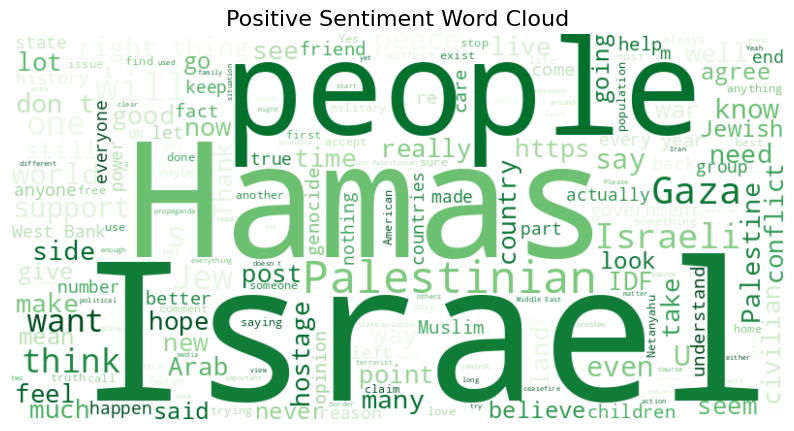

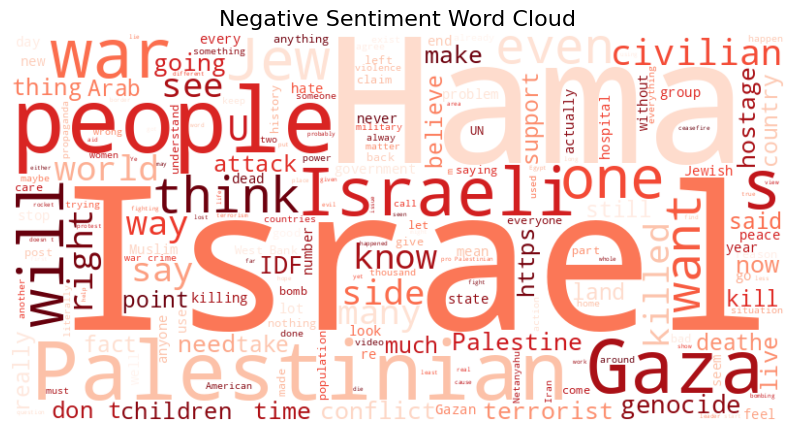

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter comments for positive and negative sentiments
positive_comments = " ".join(df[df['Vader_Sentiment'] == 'Positive']['Comments'])
negative_comments = " ".join(df[df['Vader_Sentiment'] == 'Negative']['Comments'])

# Define a function to generate word clouds
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        colormap=color,
        max_words=200
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Generate positive word cloud
generate_wordcloud(positive_comments, "Positive Sentiment Word Cloud", "Greens")

# Generate negative word cloud
generate_wordcloud(negative_comments, "Negative Sentiment Word Cloud", "Reds")


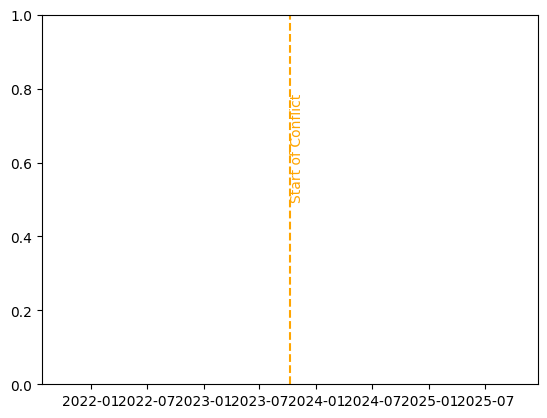

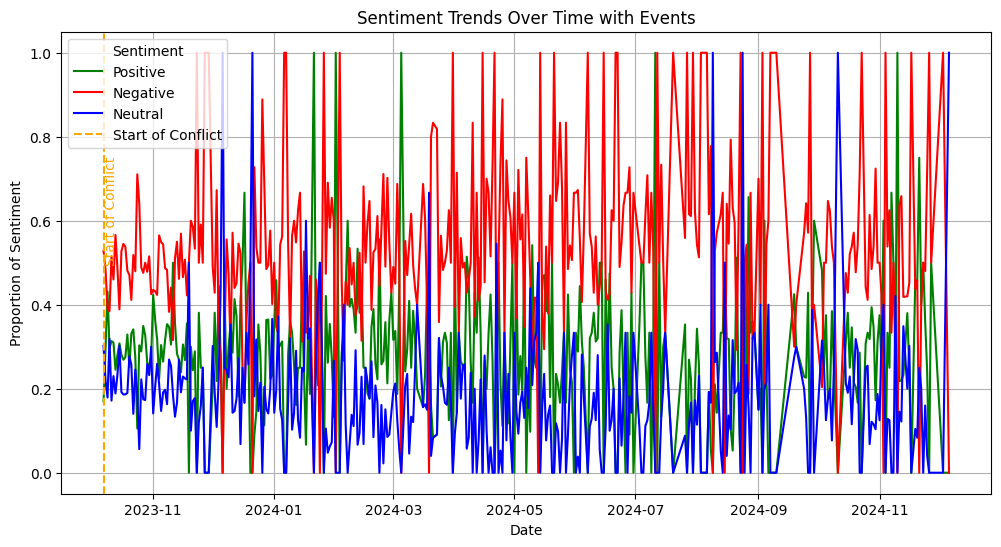

In [ ]:
# Add vertical lines for real-world events
plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

# Re-plot the trends with annotations
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

plt.title("Sentiment Trends Over Time with Events")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

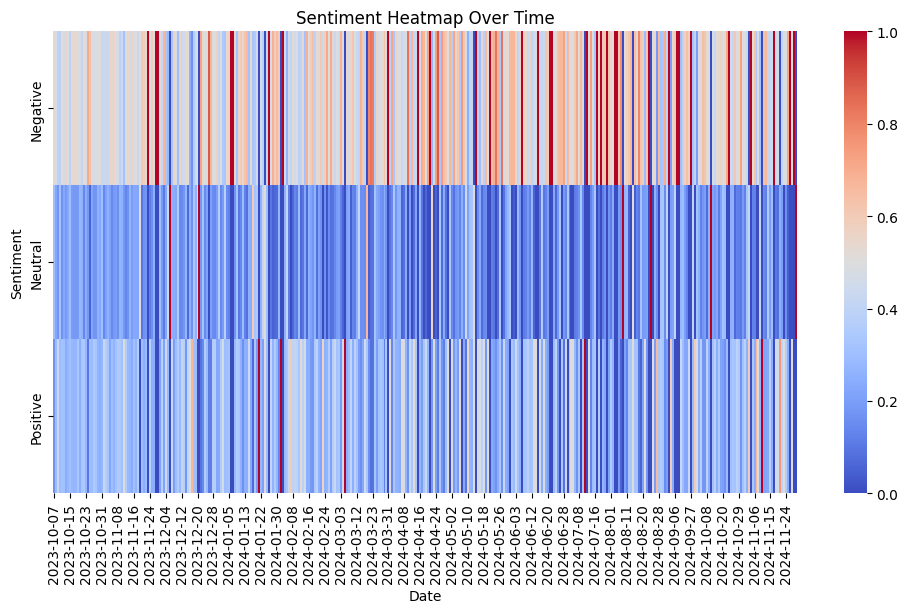

In [ ]:
import seaborn as sns

# Create a heatmap for sentiment proportions
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_trends.set_index('Comment_Created_Date').T, cmap='coolwarm', annot=False, cbar=True)

plt.title("Sentiment Heatmap Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.show()

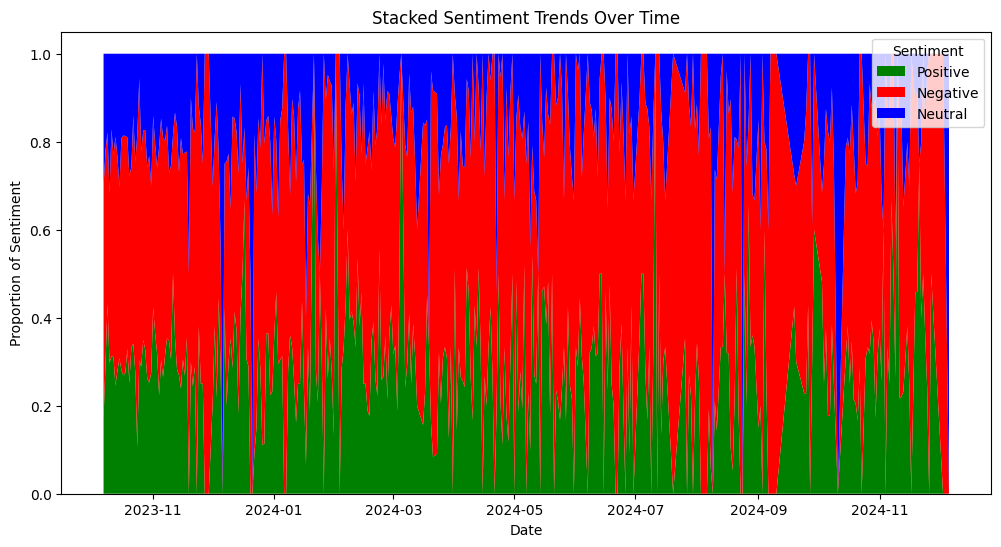

In [ ]:
# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    sentiment_trends['Comment_Created_Date'],
    sentiment_trends['Positive'],
    sentiment_trends['Negative'],
    sentiment_trends['Neutral'],
    labels=['Positive', 'Negative', 'Neutral'],
    colors=['green', 'red', 'blue']
)

plt.title("Stacked Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-174-939d5dfbfaeb>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=positive_df, palette="Blues_r")


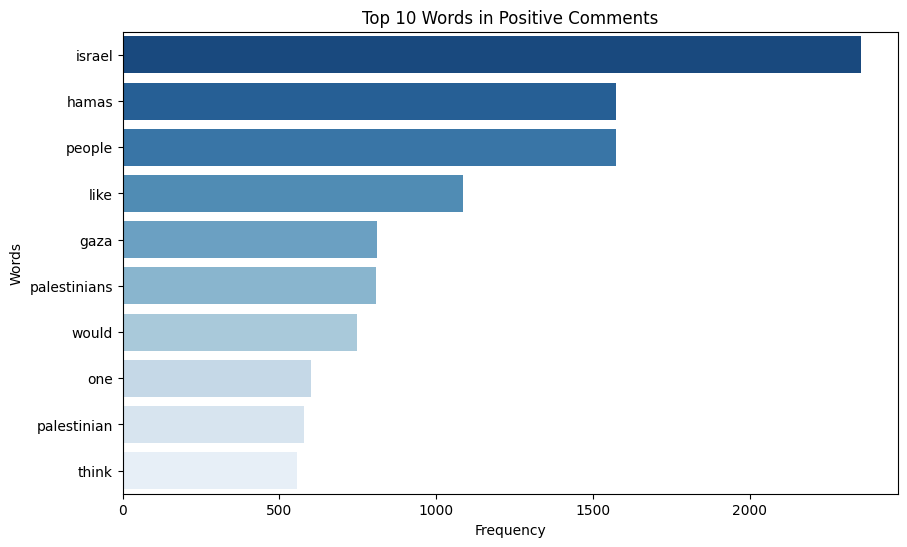

<ipython-input-174-939d5dfbfaeb>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=negative_df, palette="Reds_r")


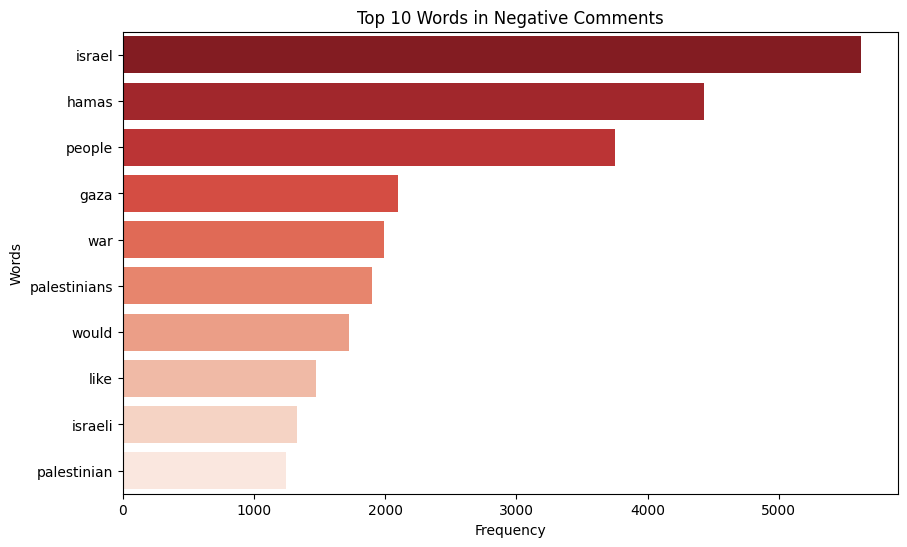

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')  # Download the Punkt tokenizer model
stop_words = set(stopwords.words('english'))

# Filter positive and negative comments
positive_comments = df[df['Vader_Sentiment'] == 'Positive']['Comments']
negative_comments = df[df['Vader_Sentiment'] == 'Negative']['Comments']

# Function to tokenize and clean text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Tokenize and count words for positive comments
positive_words = []
for comment in positive_comments:
    positive_words.extend(preprocess_text(comment))
positive_word_counts = Counter(positive_words).most_common(10)

# Tokenize and count words for negative comments
negative_words = []
for comment in negative_comments:
    negative_words.extend(preprocess_text(comment))
negative_word_counts = Counter(negative_words).most_common(10)

# Convert counts to DataFrame for plotting
positive_df = pd.DataFrame(positive_word_counts, columns=['Word', 'Count'])
negative_df = pd.DataFrame(negative_word_counts, columns=['Word', 'Count'])

# Plot horizontal bar graph for positive words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=positive_df, palette="Blues_r")
plt.title("Top 10 Words in Positive Comments")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot horizontal bar graph for negative words
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=negative_df, palette="Reds_r")
plt.title("Top 10 Words in Negative Comments")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


## Task 5: Topic Modeling

In [ ]:
pip install gensim nltk

In [ ]:
# Preprocess Data for LDA
# Remove stopwords, lemmatize, and clean the text.
#Use Gensim’s Dictionary and Corpus to prepare the data for LDA.
import gensim
from gensim import corpora
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_tokens(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 2]

In [ ]:
# Apply corrected token cleaning
df['Cleaned_Tokens'] = df['Tokenized_Text'].apply(clean_tokens)

In [ ]:
# Display rows with non-empty token lists
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) > 0)][['Comments', 'Cleaned_Tokens']].head())

# Check rows with empty Cleaned_Tokens
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) == 0)][['Comments', 'Cleaned_Tokens']].head())

                                            Comments  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Cleaned_Tokens  
0  [per, CNN, Israeli, Prime, Minister, Benjamin,...  
1  [Whats, long, game, hereish, weeks, Israel, ob...  
2    [Good, job, diplomats, changing, Isreals, mind]  
3  [The, crucial, position, advance, humanitarian...  
4  [Everybody, hates, United, States, time, Unite...  
                 Comments Cleaned_Tokens
818                💪🏼🇮🇱✊🏼             []
1056  Oh here we go again             []
1927     Oh, do they now.             []
2217                   ❤️             []
2223       So, it's over?             []


In [ ]:
from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['Cleaned_Tokens'])
corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Tokens']]

# Check the dictionary and corpus
print(f"Number of unique tokens in dictionary: {len(dictionary)}")
print(f"Number of documents in corpus: {len(corpus)}")
print("Sample Corpus (First 3 Rows):")
print(corpus[:3])

Number of unique tokens in dictionary: 29172
Number of documents in corpus: 14835
Sample Corpus (First 3 Rows):
[[(0, 2), (1, 1), (2, 3), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 2), (53, 1), (54, 5)], [(4, 1), (5, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 1), (68, 1)], [(69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)]]


count    14835.000000
mean        28.981395
std         46.330082
min          0.000000
25%          6.000000
50%         14.000000
75%         32.000000
max        771.000000
Name: Token_Count, dtype: float64


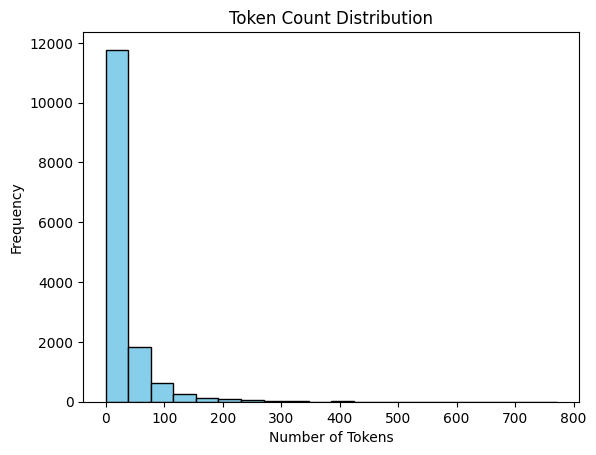

In [ ]:
# Calculate token counts per document
df['Token_Count'] = df['Cleaned_Tokens'].apply(len)

# Display summary statistics
print(df['Token_Count'].describe())

# Plot token count distribution
import matplotlib.pyplot as plt

plt.hist(df['Token_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title("Token Count Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from gensim.models import LdaModel

# Define number of topics
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.022*"people" + 0.014*"Israel" + 0.013*"dont" + 0.012*"like" + 0.009*"think" + 0.007*"Its" + 0.006*"want" + 0.006*"You" + 0.006*"right" + 0.006*"know"
Topic 2: 0.042*"Hamas" + 0.020*"Israel" + 0.015*"Gaza" + 0.013*"civilians" + 0.008*"war" + 0.008*"children" + 0.008*"IDF" + 0.008*"people" + 0.008*"killed" + 0.007*"would"
Topic 3: 0.010*"The" + 0.010*"removed" + 0.009*"Muslims" + 0.007*"news" + 0.006*"UNRWA" + 0.005*"This" + 0.005*"media" + 0.004*"evidence" + 0.004*"report" + 0.004*"condemn"
Topic 4: 0.024*"Israel" + 0.016*"Palestinians" + 0.014*"The" + 0.011*"Palestinian" + 0.010*"state" + 0.009*"Gaza" + 0.007*"land" + 0.007*"Jews" + 0.007*"Israeli" + 0.006*"peace"
Topic 5: 0.022*"deleted" + 0.006*"data" + 0.006*"progressive" + 0.006*"count" + 0.005*"leftists" + 0.005*"leftist" + 0.004*"sharing" + 0.004*"campus" + 0.004*"accepted" + 0.004*"israelis"


In [ ]:
# Define number of topics
num_topics = 10

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.072*"hamas" + 0.060*"israel" + 0.031*"palestinians" + 0.030*"gaza" + 0.018*"oppressed" + 0.016*"condemn" + 0.014*"jewish" + 0.014*"minority" + 0.013*"mentioned" + 0.012*"bank"
Topic 2: 0.018*"citizenship" + 0.012*"homeland" + 0.012*"sea" + 0.011*"israeli" + 0.010*"palestine" + 0.010*"research" + 0.009*"Pro" + 0.009*"pain" + 0.008*"river" + 0.008*"criticism"
Topic 3: 0.044*"Hamas" + 0.023*"Israel" + 0.022*"Gaza" + 0.013*"civilians" + 0.012*"The" + 0.010*"war" + 0.009*"IDF" + 0.008*"Israeli" + 0.007*"children" + 0.007*"would"
Topic 4: 0.019*"like" + 0.009*"get" + 0.009*"dont" + 0.007*"bad" + 0.007*"good" + 0.006*"really" + 0.006*"Israel" + 0.006*"theyre" + 0.006*"going" + 0.005*"take"
Topic 5: 0.018*"UNRWA" + 0.016*"Thank" + 0.012*"refugee" + 0.011*"Lebanese" + 0.009*"refugees" + 0.009*"post" + 0.009*"committing" + 0.009*"conversation" + 0.009*"critical" + 0.009*"sub"
Topic 6: 0.053*"Jews" + 0.024*"Jewish" + 0.014*"people" + 0.011*"hate" + 0.009*"Mus

In [ ]:
# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for row in lda_model[corpus]:
        row = sorted(row, key=lambda x: x[1], reverse=True)
        dominant_topics.append(row[0][0])  # Get the topic with the highest weight
    return dominant_topics

# Assign dominant topics to the dataset
df['Dominant_Topic'] = get_dominant_topic(lda_model, corpus)

# View the updated DataFrame
print(df[['Comments', 'Dominant_Topic']].head())

                                            Comments  Dominant_Topic
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...               2
1  What’s the long game here?(3ish weeks) does Is...               2
2  Good job to U.S. diplomats for changing Isreal...               4
3  The US is in a crucial position to advance the...               1
4  Everybody hates the United States until it’s t...               6


In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.9 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)

## Task 6: Stylometric Analysis and Visualization

In [ ]:
# Feature Extraction Using Text Statistics
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the Comment_Text or Preprocessed Text
text_data = df['Cleaned_Tokens'].apply(lambda tokens: " ".join(tokens))  # Join tokens back to text

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Use unigrams and bigrams
X = vectorizer.fit_transform(text_data)

print("Shape of TF-IDF matrix:", X.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of TF-IDF matrix: (14835, 1000)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


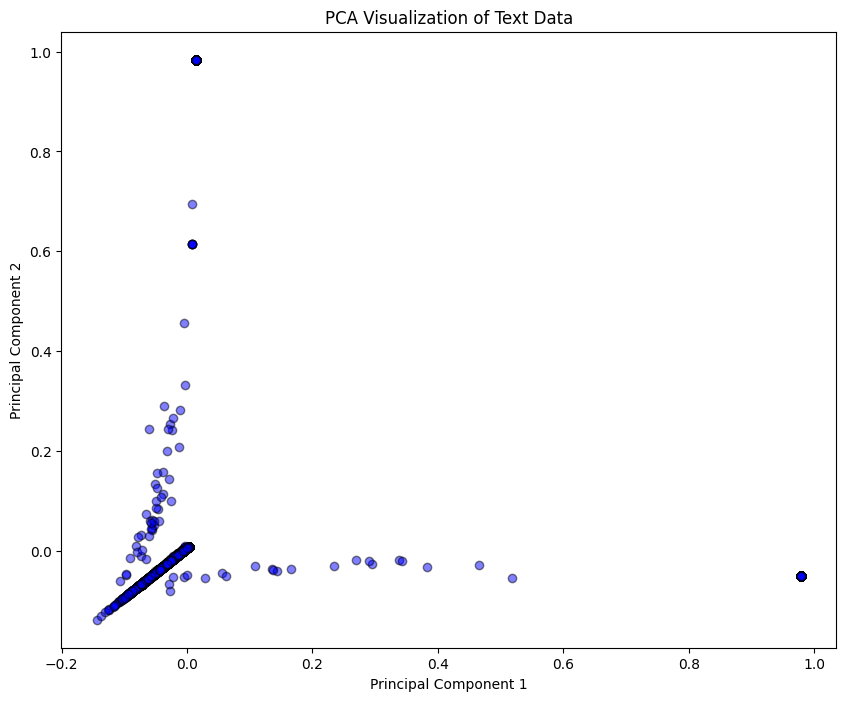

In [ ]:
# Dimensionality Reduction Using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.5,c='blue',edgecolor='k')
plt.title('PCA Visualization of Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


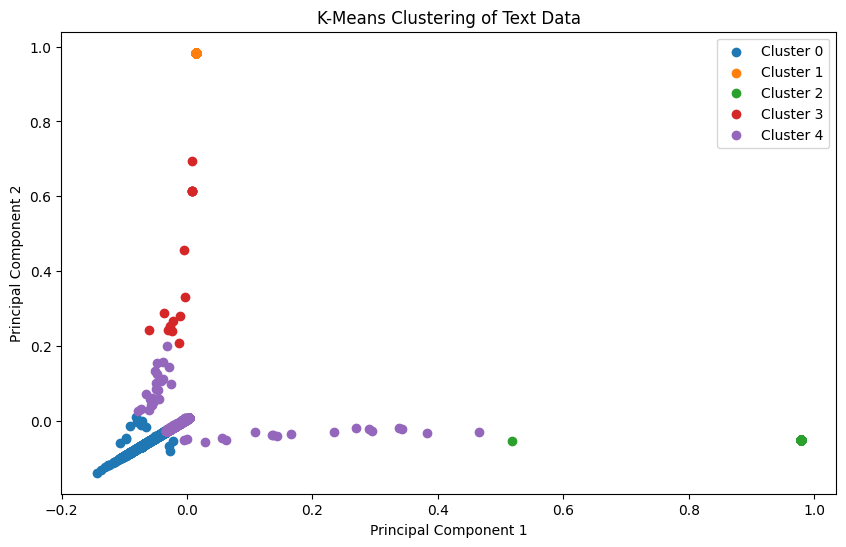

In [ ]:
# Clustering with K-Means
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters

#Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.title("K-Means Clustering of Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


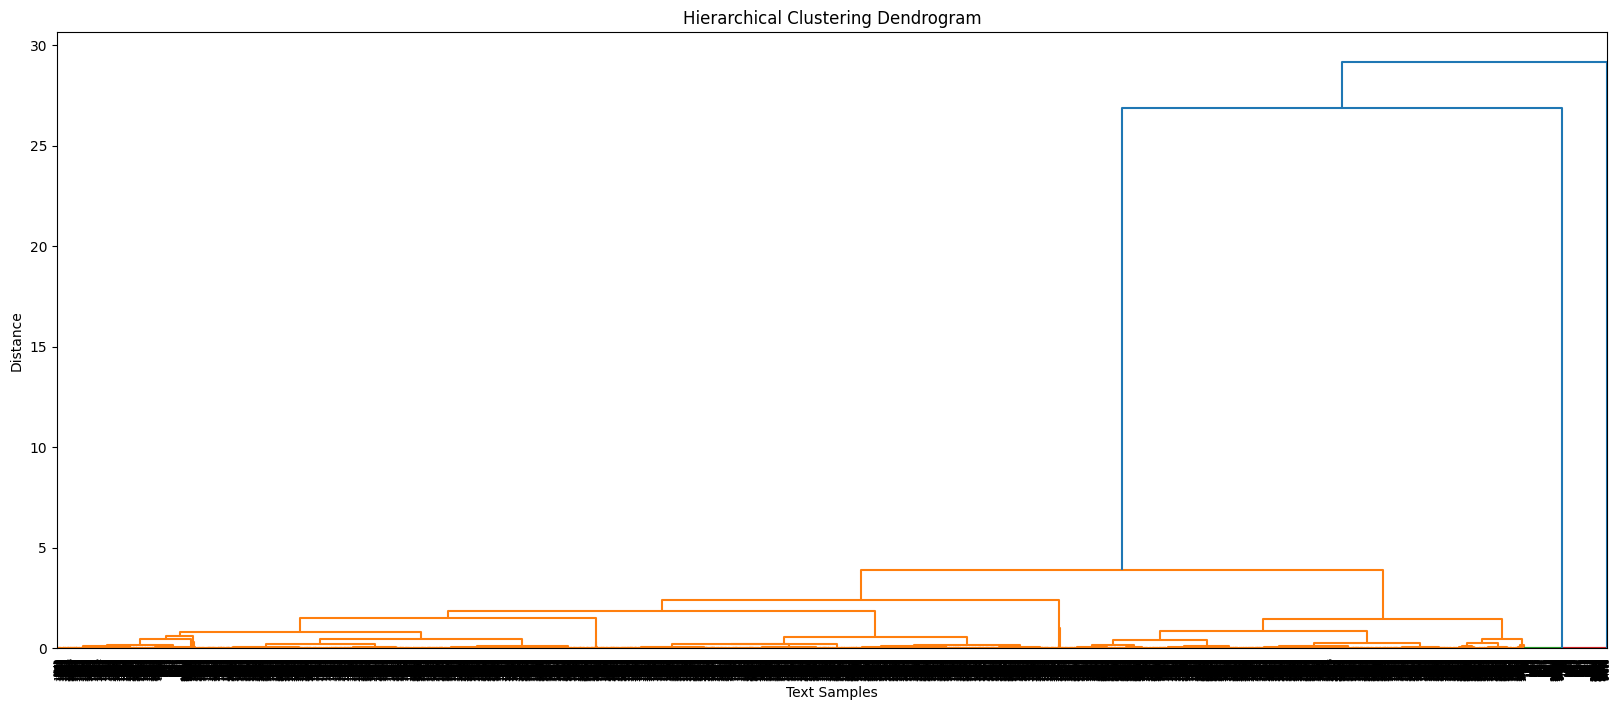

In [ ]:
# Visualize Text Patterns Using Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Use PCA-reduced data for hierarchical clustering
linkage_matrix = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


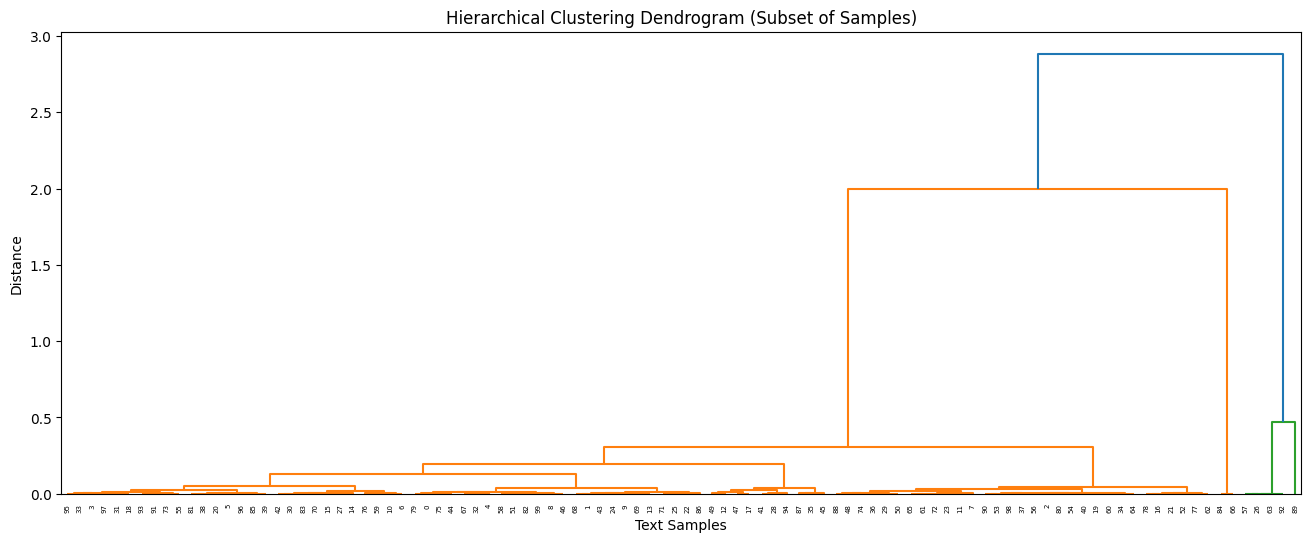

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Sample a subset of data
subset_indices = np.random.choice(range(len(X_pca)), size=100, replace=False)
X_pca_subset = X_pca[subset_indices]

# Perform hierarchical clustering
linkage_matrix_subset = linkage(X_pca_subset, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix_subset, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Subset of Samples)")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


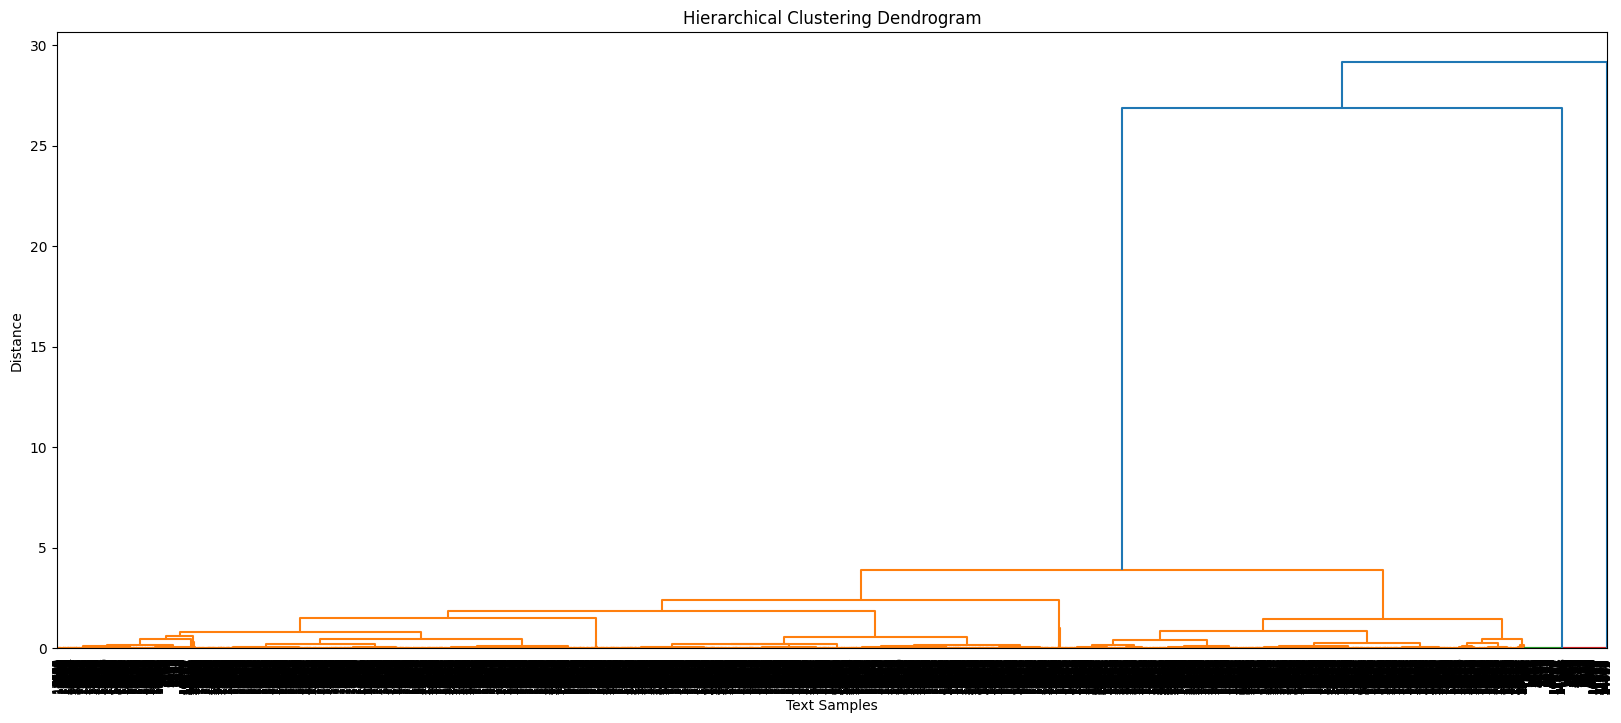

In [ ]:
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True,
           leaf_rotation=90,   # Rotate x-axis labels
           leaf_font_size=8)   # Adjust font size

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


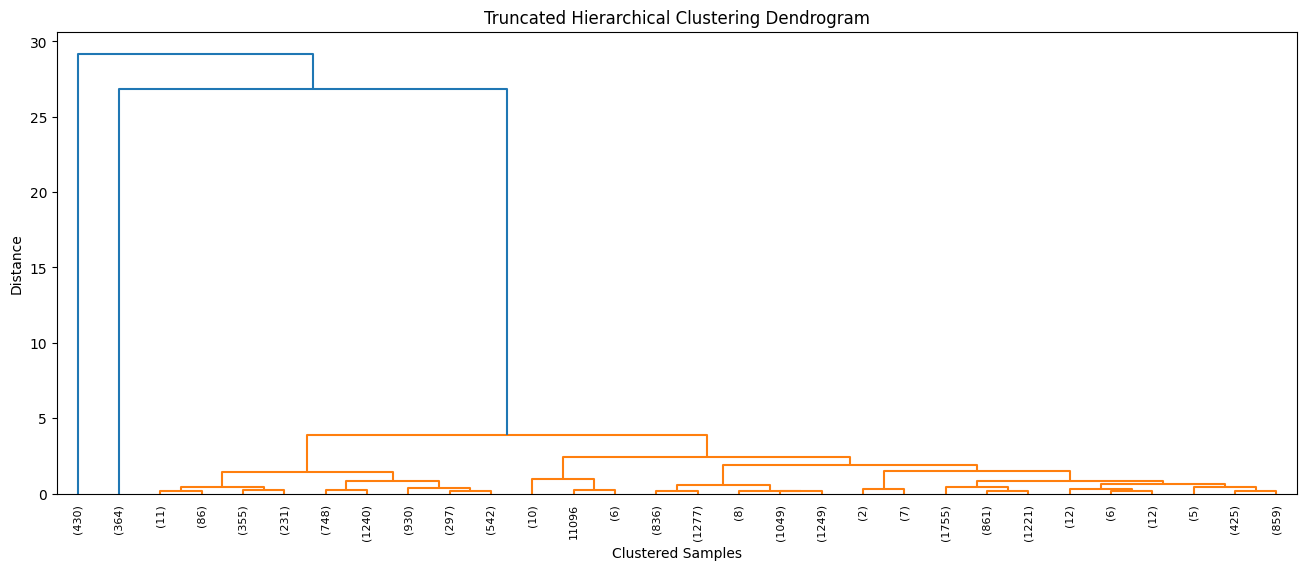

In [ ]:
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Show only the last p clusters
           p=30,                   # Number of clusters to show
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8)

plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Clustered Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


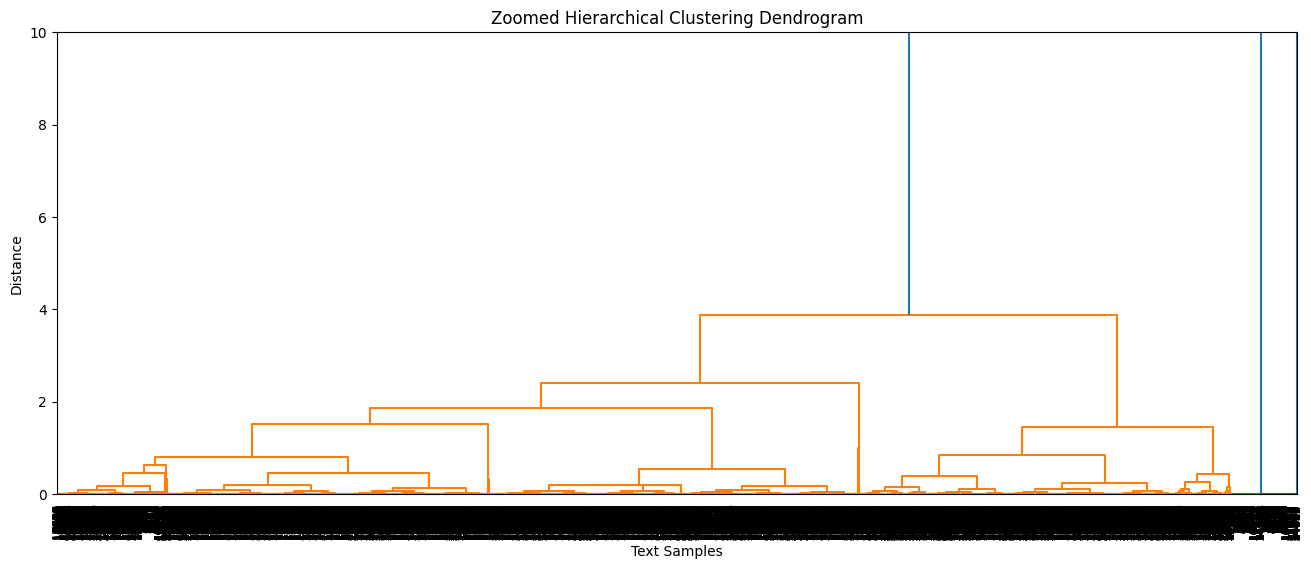

In [ ]:
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8)

plt.ylim(0, 10)
plt.title("Zoomed Hierarchical Clustering Dendrogram")
plt.xlabel("Text Samples")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


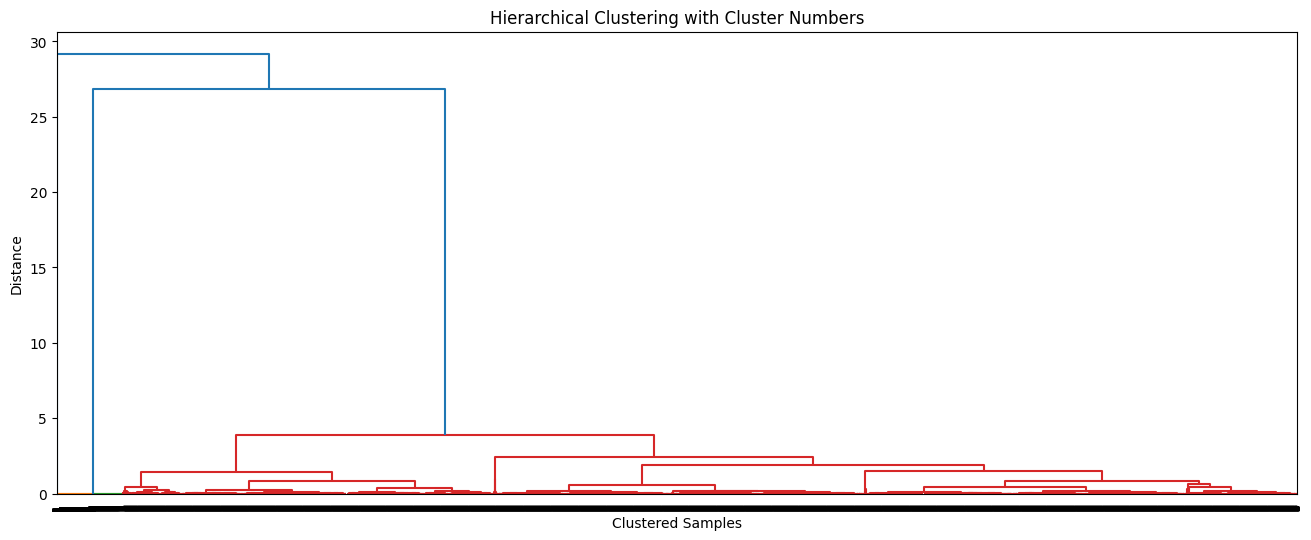

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Perform clustering and retrieve cluster assignments
max_d = 10  # Distance threshold for clusters
clusters = fcluster(linkage_matrix, max_d, criterion='distance')


plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8,
           labels=clusters)

plt.title("Hierarchical Clustering with Cluster Numbers")
plt.xlabel("Clustered Samples")
plt.ylabel("Distance")
plt.show()

## Task 7: Document Clustering with Word2Vec or Doc2Vec

In [ ]:
pip install gensim sklearn matplotlib nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Use the cleaned tokenized text for clustering
text_data = df['Cleaned_Tokens'].apply(lambda tokens: " ".join(tokens))  # Convert token lists to sentences
print(text_data.head())

0    per CNN Israeli Prime Minister Benjamin Netany...
1    Whats long game hereish weeks Israel obliterat...
2             Good job diplomats changing Isreals mind
3    The crucial position advance humanitarian corr...
4    Everybody hates United States time United Stat...
Name: Cleaned_Tokens, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(words=text.split(), tags=[str(index)]) for index, text in enumerate(text_data)]

print(tagged_data[:3])

[TaggedDocument(words=['per', 'CNN', 'Israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahus', 'office', 'told', 'CNN', 'Sunday', 'Israel', 'restored', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 'Water', 'Authority', 'said', 'could', 'sure', 'true', 'electricity', 'restored', 'cannot', 'confirm', 'moment', 'water', 'stations', 'Khan', 'Younis', 'Gaza', 'City', 'central', 'Gaza', 'condition', 'receive', 'distribute', 'water', 'people', 'Munther', 'Shublaq', 'director', 'Water', 'Authority', 'Gaza', 'told', 'CNN', 'enable', 'stations', 'receive', 'distribute', 'water', 'need', 'electricity', 'currently', 'cut', 'The', 'alternative', 'fuel', 'power', 'generator', 'also', 'There', 'may', 'pressure', 'restore', 'water', 'supply', 'cannot', 'confirm', 'anything', 'stations', 'ready'], tags=['0']), TaggedDocument(words=['Whats', 'long', 'game', 'hereish', 'weeks', 'Israel', 'obliterate', 'northern', 'GazaHamas', 'slowly', 'invitevet', 'nonHamas', 'Palestinians', 'back', 'northern

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train the Doc2Vec Model

In [ ]:
from gensim.models.doc2vec import Doc2Vec

# Train the Doc2Vec model
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=2, workers=4, epochs=20)

# Save the model
model.save("doc2vec_model")

# Generate document vectors
doc_vectors = [model.dv[str(i)] for i in range(len(tagged_data))]
print("Number of document vectors:", len(doc_vectors))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of document vectors: 14835


Apply K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(doc_vectors)

print("Cluster Assignments:")
print(df['Cluster'].value_counts())

df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster Assignments:
Cluster
2    10332
0     2764
1     1269
3      262
4      208
Name: count, dtype: int64


Visualize Clusters Using t-SNE

In [ ]:
pip install sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


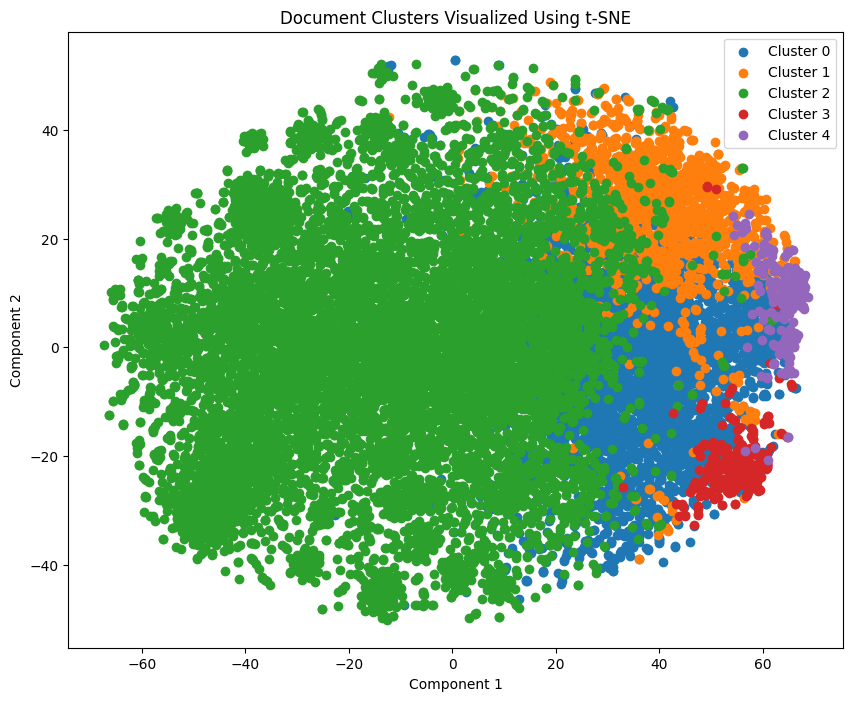

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ensure doc_vectors is a NumPy array
doc_vectors = np.array(doc_vectors)

# reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(doc_vectors)

# Plot the Clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(X_tsne[df['Cluster'] == cluster, 0], X_tsne[df['Cluster'] == cluster, 1], label=f"Cluster {cluster}")

plt.title("Document Clusters Visualized Using t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

In [ ]:
for cluster in range(num_clusters):
    print(f"\nDocuments in Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Comments'].head(5))  # sample comments for each cluster


Documents in Cluster 0:
19    We're not supplying them water, we're freely g...
20    Good. I want Hamas blasted out of existence, b...
21    “Provide water to your mortal enemies for free...
23    Israel only supplies 10% of water to the gaza ...
31    I don't see any mention of release of hostages...
Name: Comments, dtype: object

Documents in Cluster 1:
79     Theres a lot of people out there who should ha...
121    This is a good reminder that, for many people,...
191    Really difficult to understamd why people demo...
196    What happened to her children. Can you imagine...
341    No one can convince me otherwise that Netanyah...
Name: Comments, dtype: object

Documents in Cluster 2:
1    What’s the long game here?(3ish weeks) does Is...
2    Good job to U.S. diplomats for changing Isreal...
3    The US is in a crucial position to advance the...
4    Everybody hates the United States until it’s t...
5    Oh thank fuck\n\nEdit: I feel bad for having s...
Name: Comments, dtype: ob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Task 8: Dependency Parsing and Advanced Structures

Load the Data and Initialize SpaCy

In [ ]:
# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Take a subset of sentences for parsing (e.g., first 5 comments)
subset_sentences = df['Comments'].dropna().head(5)
print("Sample Sentences for Parsing:")
print(subset_sentences)

Sample Sentences for Parsing:
0    As per CNN\n\nIsraeli Prime Minister Benjamin ...
1    What’s the long game here?(3ish weeks) does Is...
2    Good job to U.S. diplomats for changing Isreal...
3    The US is in a crucial position to advance the...
4    Everybody hates the United States until it’s t...
Name: Comments, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perform Dependency Parsing

In [ ]:
def dependency_parse(text):
    doc = nlp(text)  # Parse the text
    parsed_output = []
    for token in doc:
        parsed_output.append({
            "Word": token.text,
            "POS": token.pos_,
            "Dependency": token.dep_,
            "Head": token.head.text,
            "Children": [child.text for child in token.children]
        })
    return parsed_output

# Apply dependency parsing on the subset
parsed_sentences = subset_sentences.apply(dependency_parse)

# Display parsed results
for idx, sentence in enumerate(parsed_sentences):
    print(f"\nSentence {idx + 1} Parsed Results:")
    for word_data in sentence:
        print(f"Word: {word_data['Word']}, POS: {word_data['POS']}, "
              f"Dependency: {word_data['Dependency']}, Head: {word_data['Head']}, "
              f"Children: {word_data['Children']}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Sentence 1 Parsed Results:
Word: As, POS: ADP, Dependency: prep, Head: told, Children: ['per']
Word: per, POS: ADP, Dependency: prep, Head: As, Children: ['CNN']
Word: CNN, POS: PROPN, Dependency: pobj, Head: per, Children: ['\n\n']
Word: 

, POS: SPACE, Dependency: dep, Head: CNN, Children: []
Word: Israeli, POS: ADJ, Dependency: amod, Head: Minister, Children: []
Word: Prime, POS: PROPN, Dependency: compound, Head: Minister, Children: []
Word: Minister, POS: PROPN, Dependency: compound, Head: Netanyahu, Children: ['Israeli', 'Prime']
Word: Benjamin, POS: PROPN, Dependency: compound, Head: Netanyahu, Children: []
Word: Netanyahu, POS: PROPN, Dependency: poss, Head: office, Children: ['Minister', 'Benjamin', '’s']
Word: ’s, POS: PART, Dependency: case, Head: Netanyahu, Children: []
Word: office, POS: NOUN, Dependency: nsubj, Head: told, Children: ['Netanyahu']
Word: told, POS: VERB, Dependency: ROOT, Head: told, Children: ['As', 'office', 'CNN', 'restored', ',', 'but', 'said']
Word: C

Visualize Dependency Parse Tree

In [ ]:
from spacy import displacy

# Visualize the dependency parse for the first sentence
for idx, text in enumerate(subset_sentences):
    print(f"\nVisualizing Sentence {idx + 1}: {text}")
    doc = nlp(text)
    displacy.render(doc, style="dep", jupyter=True, options={"distance": 90})


Visualizing Sentence 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Visualizing Sentence 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?



Visualizing Sentence 3: Good job to U.S. diplomats for changing Isreal's mind.



Visualizing Sentence 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests that do no endanger civilians at home or elsewhere.



Visualizing Sentence 5: Everybody hates the United States until it’s time to do United States stuff


Export Visualizations

In [ ]:
from spacy import displacy

# Save the dependency tree visualization to an HTML file
for idx, text in enumerate(subset_sentences):
    doc = nlp(text)
    output_path = f"sentence_{idx + 1}_dependency_tree.html"
    with open(output_path, "w", encoding="utf-8") as f:
        html = displacy.render(doc, style="dep", page=True, jupyter=False)
        f.write(html)  # Write the returned HTML string
    print(f"Saved visualization for Sentence {idx + 1} as {output_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saved visualization for Sentence 1 as sentence_1_dependency_tree.html
Saved visualization for Sentence 2 as sentence_2_dependency_tree.html
Saved visualization for Sentence 3 as sentence_3_dependency_tree.html
Saved visualization for Sentence 4 as sentence_4_dependency_tree.html
Saved visualization for Sentence 5 as sentence_5_dependency_tree.html


In [ ]:
pip install cairosvg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install pillow


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy
from spacy import displacy
from io import BytesIO
from PIL import Image
import cairosvg  # Ensure you have this installed: pip install cairosvg

# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Take a subset of sentences for parsing
subset_sentences = df['Comments'].dropna().head(5)
print("Sample Sentences for Parsing:")
print(subset_sentences)

# Save dependency trees as PNG images
for idx, text in enumerate(subset_sentences):
    print(f"\nGenerating Image for Sentence {idx + 1}: {text}")

    # Parse the sentence
    doc = nlp(text)

    # Render the dependency tree as SVG
    svg = displacy.render(doc, style="dep", jupyter=False, options={"compact": True, "color": "blue", "bg": "#f5f5f5"})

    # Convert SVG to PNG using cairosvg
    png_data = BytesIO(cairosvg.svg2png(bytestring=svg))
    image = Image.open(png_data)

    # Show the image directly
    image.show()  # Opens the image using the default image viewer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sample Sentences for Parsing:
0    As per CNN\n\nIsraeli Prime Minister Benjamin ...
1    What’s the long game here?(3ish weeks) does Is...
2    Good job to U.S. diplomats for changing Isreal...
3    The US is in a crucial position to advance the...
4    Everybody hates the United States until it’s t...
Name: Comments, dtype: object

Generating Image for Sentence 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative 

## Bonus Task: Implement an Advanced NLP Technique

Option 1: Text Summarization Using Hugging Face Transformers

In [ ]:
pip install transformers torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select a few comments for summarization
comments = df['Comments'].dropna().head(5).tolist()

# Display sample comments
for i, comment in enumerate(comments, 1):
    print(f"Comment {i}: {comment}\n")

Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”

Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can oblite

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Summarize each comment
print("Summarized Comments:")
for i, comment in enumerate(comments, 1):
    summary = summarizer(comment, max_length=50, min_length=20, do_sample=False)[0]['summary_text']
    print(f"Original Comment {i}: {comment}")
    print(f"Summary {i}: {summary}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Summarized Comments:


Your max_length is set to 50, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


Original Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Summary 1: Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza. But the director of the Palestinian Water Authority said

Your max_length is set to 50, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?
Summary 2: What’s the long game here? Does Israel obliterate northern Gaza/Hamas, and then slowly invite/vet non-Hamas Palestinians back into northern Gaza so they can obliterate the south?



Your max_length is set to 50, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)


Original Comment 3: Good job to U.S. diplomats for changing Isreal's mind.
Summary 3: U.S. diplomats have changed Isreal's mind. Good job to U.S.-based diplomats for changing Isreal’s mind.



Your max_length is set to 50, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Comment 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests that do no endanger civilians at home or elsewhere.
Summary 4: The US is in a crucial position to advance the humanitarian corridor to innocent Palestinians. You accept our taxpayer dollars then your government needs to comply with reasonable requests.

Original Comment 5: Everybody hates the United States until it’s time to do United States stuff
Summary 5: Everybody hates the U.S. until it’s time to do United States stuff.



In [ ]:
import pandas as pd
from transformers import pipeline

#Select a few comments for summarization
comments = df['Comments'].dropna().head(5).tolist()

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Summarize each comment and store the results
summarized_data = []
for comment in comments:
    summary = summarizer(comment, max_length=50, min_length=20, do_sample=False)[0]['summary_text']
    summarized_data.append({"Original Comment": comment, "Summary": summary})

# Convert to a DataFrame for better visualization
summary_df = pd.DataFrame(summarized_data)

# Display the DataFrame with both columns
summary_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Device set to use cpu
Your max_length is set to 50, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 50, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 50, but your input_length is only 42. Since this is a summarization task, where outputs shorter than t

,Original Comment,Summary
0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,Israeli Prime Minister Benjamin Netanyahu’s of...
1,What’s the long game here?(3ish weeks) does Is...,What’s the long game here? Does Israel obliter...
2,Good job to U.S. diplomats for changing Isreal...,U.S. diplomats have changed Isreal's mind. Goo...
3,The US is in a crucial position to advance the...,The US is in a crucial position to advance the...
4,Everybody hates the United States until it’s t...,Everybody hates the U.S. until it’s time to do...


Option 2: Sentiment Classification Using BERT

In [ ]:
from transformers import pipeline

# Load the sentiment-analysis pipeline
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analyze sentiment for sample comments
print("Sentiment Analysis with BERT:")
for i, comment in enumerate(comments, 1):
    sentiment = classifier(comment)[0]
    print(f"Comment {i}: {comment}")
    print(f"Sentiment: {sentiment['label']} (Confidence: {sentiment['score']:.2f})\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Sentiment Analysis with BERT:
Comment 1: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Sentiment: 1 star (Confidence: 0.31)

Comment 2: What’s the long game here?(3ish weeks) does Israel obliterate northern Gaza/Hamas, and then slowly invite/ve

In [ ]:
import pandas as pd
from transformers import pipeline

# Load the sentiment-analysis pipeline
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Analyze sentiment for sample comments
sentiment_results = []
for comment in comments:
    sentiment = classifier(comment)[0]
    sentiment_results.append({
        "Original Comment": comment,
        "Sentiment": sentiment['label'],
        "Confidence": round(sentiment['score'], 2)
    })

# Convert results to a DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Display the DataFrame with all columns
print(sentiment_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Device set to use cpu


                                    Original Comment Sentiment  Confidence
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...    1 star        0.31
1  What’s the long game here?(3ish weeks) does Is...    1 star        0.32
2  Good job to U.S. diplomats for changing Isreal...   4 stars        0.63
3  The US is in a crucial position to advance the...   4 stars        0.35
4  Everybody hates the United States until it’s t...    1 star        0.47


### Machine Translation

In [ ]:
from transformers import pipeline

# Load the machine translation pipeline
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")  # Translating from English to French

# Translate the comments to French
translated_comments = []
for comment in comments:
    translation = translator(comment, max_length=500)[0]['translation_text']
    translated_comments.append({
        "Original Comment": comment,
        "Translated Comment (French)": translation
    })

# Convert results to a DataFrame
translation_df = pd.DataFrame(translated_comments)

# Display the DataFrame with translations
print(translation_df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


                                    Original Comment  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                         Translated Comment (French)  
0  Selon le Premier ministre israélien de CNN, Be...  
1  Quel est le long jeu ici?(3 semaines) Israël o...  
2  Bon travail pour les diplomates américains pou...  
3  Les États-Unis sont dans une position cruciale...  
4  Tout le monde déteste les États-Unis jusqu'à c...  
